In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# part a

In [15]:
def bitplane_slice(image1):
    
    image1 = np.dot(image1[..., :3], [0.299, 0.587, 0.114])
    bit_sliced1 = [np.zeros(image1.shape)]*8
    for i in range(8):
        bit_sliced1[i] = np.mod(np.floor(image1/np.power(2, i)), 2).astype('int')
        
    
    return bit_sliced1

In [16]:
highway_1 = cv.imread('P4/highway_1.png')
highway_2 = cv.imread('P4/highway_2.png')

In [18]:
a = bitplane_slice(highway_1)

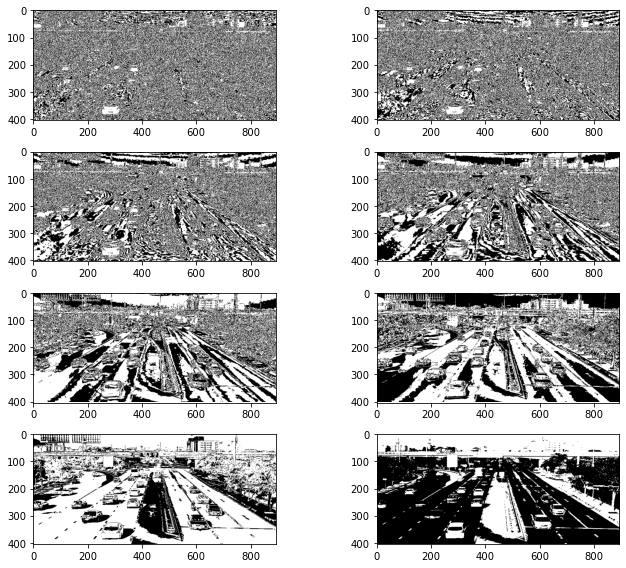

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=4)
fig.set_size_inches(10, 8)
axes = axes.ravel()
axes[0].imshow(a[0],cmap='gray')
axes[1].imshow(a[1],cmap='gray')
axes[2].imshow(a[2],cmap='gray')
axes[3].imshow(a[3],cmap='gray')
axes[4].imshow(a[4],cmap='gray')
axes[5].imshow(a[5],cmap='gray')
axes[6].imshow(a[6],cmap='gray')
axes[7].imshow(a[7],cmap='gray')

fig.tight_layout()
plt.show()

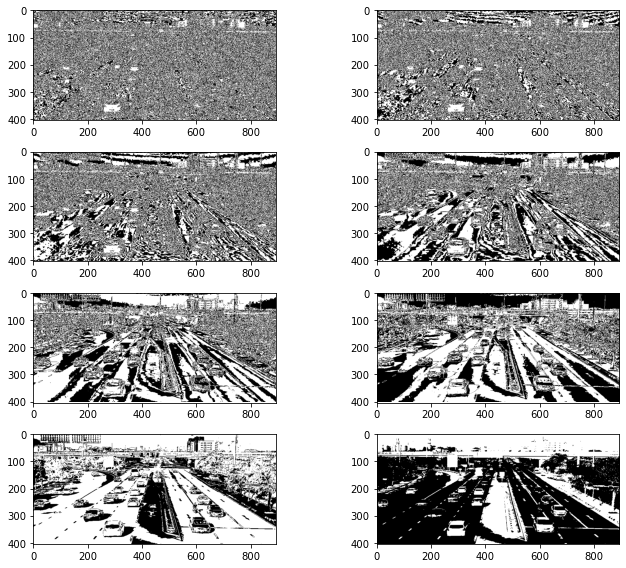

In [20]:
a = bitplane_slice(highway_2)
fig, axes = plt.subplots(ncols=2, nrows=4)
fig.set_size_inches(10, 8)
axes = axes.ravel()
axes[0].imshow(a[0],cmap='gray')
axes[1].imshow(a[1],cmap='gray')
axes[2].imshow(a[2],cmap='gray')
axes[3].imshow(a[3],cmap='gray')
axes[4].imshow(a[4],cmap='gray')
axes[5].imshow(a[5],cmap='gray')
axes[6].imshow(a[6],cmap='gray')
axes[7].imshow(a[7],cmap='gray')

fig.tight_layout()
plt.show()

# part b

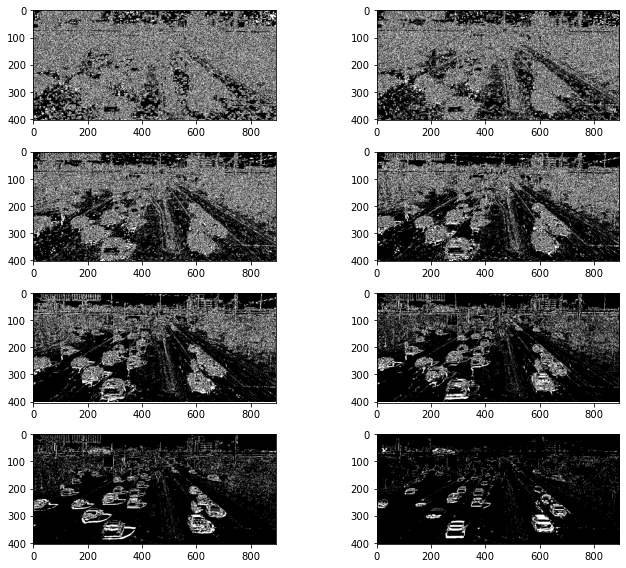

In [21]:
a = bitplane_slice(highway_1)
b = bitplane_slice(highway_2)

fig, axes = plt.subplots(ncols=2, nrows=4)
fig.set_size_inches(10, 8)
axes = axes.ravel()

axes[0].imshow(np.bitwise_xor(a[0], b[0]),cmap='gray')
axes[1].imshow(np.bitwise_xor(a[1], b[1]),cmap='gray')
axes[2].imshow(np.bitwise_xor(a[2], b[2]),cmap='gray')
axes[3].imshow(np.bitwise_xor(a[3], b[3]),cmap='gray')
axes[4].imshow(np.bitwise_xor(a[4], b[4]),cmap='gray')
axes[5].imshow(np.bitwise_xor(a[5], b[5]),cmap='gray')
axes[6].imshow(np.bitwise_xor(a[6], b[6]),cmap='gray')
axes[7].imshow(np.bitwise_xor(a[7], b[7]),cmap='gray')

fig.tight_layout()
plt.show()

# part c

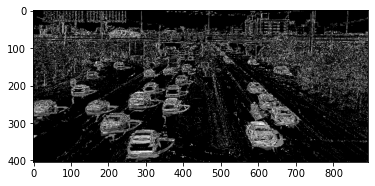

In [22]:
image = np.bitwise_xor(a[7], b[7])+np.bitwise_xor(a[6], b[6])+np.bitwise_xor(a[5], b[5])+np.bitwise_xor(a[4], b[4])
    
image = np.clip(image, 0, 255)
image =  image.astype('uint8')

plt.imshow(image,cmap='gray')

# part d

In [23]:
def _local_median(img, x, y, k):
    """
    Computes median for k-neighborhood of img[x,y]
    """
    flat = img[x-k : x+k+1, y-k : y+k+1].flatten()
    flat.sort()
    return flat[len(flat)//2]


def median(img, k=3):
    """
    Changes every pixel to the median of its neighboors
    """
    res = np.copy(img)

    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if (x-k >= 0 and x+k < img.shape[0]) and \
                    (y-k >= 0 and y+k < img.shape[1]):
                res[x, y] = _local_median(img, x, y, k)

    return res

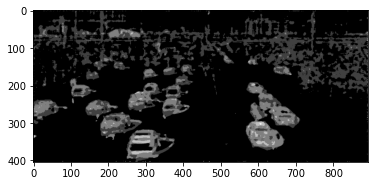

In [37]:
plt.imshow(median(image,3),cmap='gray')

In [33]:
def global_threshold(image, thres_value, val_high, val_low):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > thres_value:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img

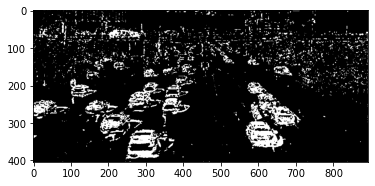

In [46]:
img = global_threshold(median(image,1), 1,255,0)
plt.imshow(img,cmap='gray')

# second image

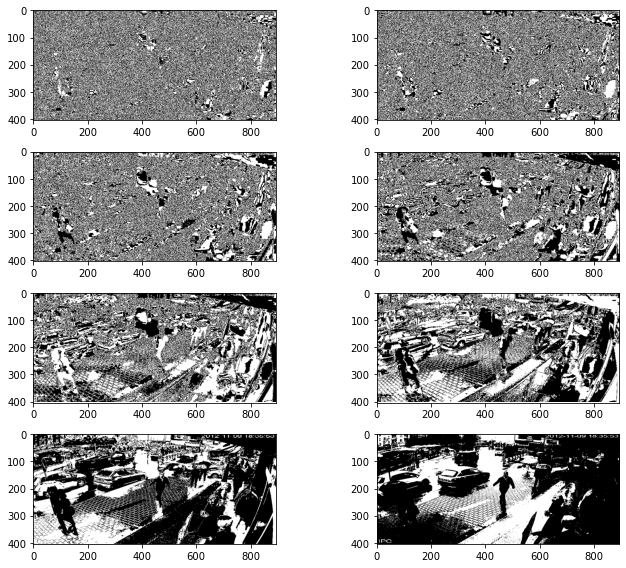

In [47]:
highway_1 = cv.imread('P4/pavement_1.png')
highway_2 = cv.imread('P4/pavement_2.png')
a = bitplane_slice(highway_1)
fig, axes = plt.subplots(ncols=2, nrows=4)
fig.set_size_inches(10, 8)
axes = axes.ravel()
axes[0].imshow(a[0],cmap='gray')
axes[1].imshow(a[1],cmap='gray')
axes[2].imshow(a[2],cmap='gray')
axes[3].imshow(a[3],cmap='gray')
axes[4].imshow(a[4],cmap='gray')
axes[5].imshow(a[5],cmap='gray')
axes[6].imshow(a[6],cmap='gray')
axes[7].imshow(a[7],cmap='gray')

fig.tight_layout()
plt.show()

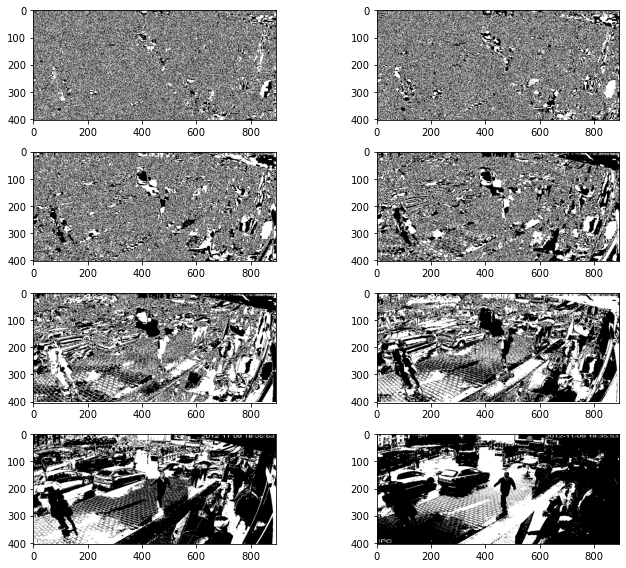

In [48]:
a = bitplane_slice(highway_2)
fig, axes = plt.subplots(ncols=2, nrows=4)
fig.set_size_inches(10, 8)
axes = axes.ravel()
axes[0].imshow(a[0],cmap='gray')
axes[1].imshow(a[1],cmap='gray')
axes[2].imshow(a[2],cmap='gray')
axes[3].imshow(a[3],cmap='gray')
axes[4].imshow(a[4],cmap='gray')
axes[5].imshow(a[5],cmap='gray')
axes[6].imshow(a[6],cmap='gray')
axes[7].imshow(a[7],cmap='gray')

fig.tight_layout()
plt.show()

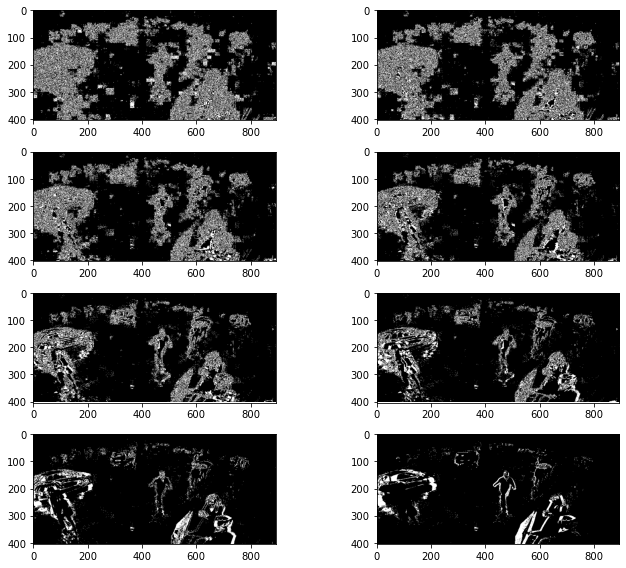

In [49]:
a = bitplane_slice(highway_1)
b = bitplane_slice(highway_2)

fig, axes = plt.subplots(ncols=2, nrows=4)
fig.set_size_inches(10, 8)
axes = axes.ravel()

axes[0].imshow(np.bitwise_xor(a[0], b[0]),cmap='gray')
axes[1].imshow(np.bitwise_xor(a[1], b[1]),cmap='gray')
axes[2].imshow(np.bitwise_xor(a[2], b[2]),cmap='gray')
axes[3].imshow(np.bitwise_xor(a[3], b[3]),cmap='gray')
axes[4].imshow(np.bitwise_xor(a[4], b[4]),cmap='gray')
axes[5].imshow(np.bitwise_xor(a[5], b[5]),cmap='gray')
axes[6].imshow(np.bitwise_xor(a[6], b[6]),cmap='gray')
axes[7].imshow(np.bitwise_xor(a[7], b[7]),cmap='gray')

fig.tight_layout()
plt.show()

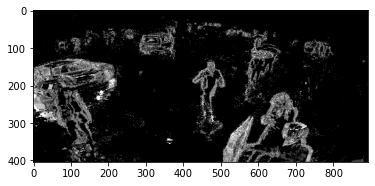

In [50]:
image = np.bitwise_xor(a[7], b[7])+np.bitwise_xor(a[6], b[6])+np.bitwise_xor(a[5], b[5])+np.bitwise_xor(a[4], b[4])
    
image = np.clip(image, 0, 255)
image =  image.astype('uint8')

plt.imshow(image,cmap='gray')

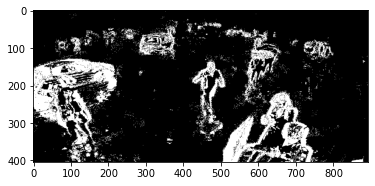

In [56]:
img = global_threshold(image, 0,255,0)
plt.imshow(img,cmap='gray')